In [1]:
#The objective of this project is to set some basic notions of how to create a basic machine learning project from 
#start to finish
########
#First we import the libraries that we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#We now proceed to load the dataset using iris as the name of the instance
iris = sklearn.datasets.load_iris()

In [3]:
#We now study the whole dataset
x = iris.data
y = iris.target
features = iris.feature_names
target = iris.target_names

In [4]:
print('The categories for our classification problem at hand are:' + str(target) + '\nWhich have the features:'+ str(features) + '\nAnd some examples of the data are:' + '\n' +str(x[:5]) )

The categories for our classification problem at hand are:['setosa' 'versicolor' 'virginica']
Which have the features:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
And some examples of the data are:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
x2 = x[:,:2]

In [6]:
#To conduct a study of the data quality we'll make a dataframe with it
df = pd.DataFrame(x, columns = features)
df['target'] = y

In [7]:
#lets see the summarization of different values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
#We see healthy data, all the values are what is expected (This is iris dataset but comment is here for educational 
#purposes)

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
#We now proceed to split it
x_train, x_test, y_train, y_test = train_test_split(x2, y, train_size=0.8, test_size=0.2)

In [10]:
#We now proceed to explore the hyper-parameter space to see how the model performs for a different ammount of neighborhs
#First we create an empty list to add the different accuracies that we record
accuracies = []
#Now the loop over the hyper-parameter
for k in range(20):
    #We instantiate a model
    knn = KNeighborsClassifier(n_neighbors=k+1)
    #Fit it
    knn.fit(x_train, y_train)
    #Predict and score it's accuracy
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(accuracy)
accuracies

[0.7,
 0.7333333333333333,
 0.8333333333333334,
 0.7666666666666667,
 0.8666666666666667,
 0.8333333333333334,
 0.8,
 0.7666666666666667,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8,
 0.8,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8,
 0.8333333333333334,
 0.8333333333333334]

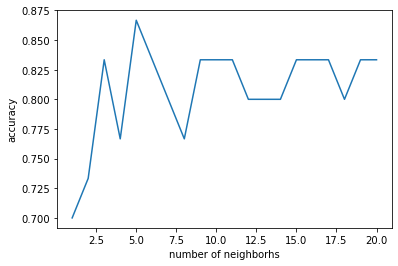

In [11]:
#We now proceed to make a graph with the different accuracies
k_list = list(range(1,21))
plt.plot(k_list, accuracies)
plt.xlabel('number of neighborhs')
plt.ylabel('accuracy')
plt.show()

In [12]:
#The best models appear to be with k=19. We will go with k=13 to make a trade-off of computing time and accuracy.
#As well as to try to avoid overfitting
########
#Now we'll proceed to do a decision boundary plot to see the boundaries in our model
model = KNeighborsClassifier(n_neighbors=13)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [19]:
#Lets now create the function that will give me de decision boundary plot
def plt_boundary(x,y,model):
    #First let's stablish the limits of the grid
    x_min, x_max = x[:,0].min() - 1, x[:,0].max() +1
    y_min, y_max = x[:,1].min() - 1, x[:,1].max() +1
    #The step size of the grid
    h=0.01
    #Create the grid 
    x_grid, y_grid = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    #Predict for all the values of the grid
    z = model.predict(np.c_[x_grid.ravel(),y_grid.ravel()])
    z = z.reshape(x_grid.shape)
    #We now create the plot and do the contours
    plt.figure()
    plt.contourf(x_grid, y_grid, z, cmap=plt.cm.RdYlBu, alpha=0.5)
    #And we plot
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu,)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision boundaries')
    plt.show()

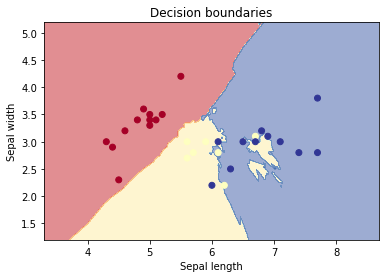

In [20]:
plt_boundary(x_test,y_test,model)

In [15]:
#From seeing that, we can easily deduce a huge ammount of overfitting. lets try to go over the hyper-parameter space
#for k in range(1,25):
#    model = KNeighborsClassifier(n_neighbors=k)
#    model.fit(x_train,y_train)
#    plt_boundary(x_test,y_test,model)
###########
#I'm leaving this here for the fun of my approach

In [16]:
#Lets now proceed to create an SVM model to try to classify the data and see how it compares to KNN.
from sklearn.svm import SVC
svm = SVC(kernel='rbf') #We are using a rbf kernel because the data as we've seen so far is not linearly separable

svm.fit(x_train,y_train)

SVC()

In [17]:
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

In [18]:
accuracy

0.8666666666666667

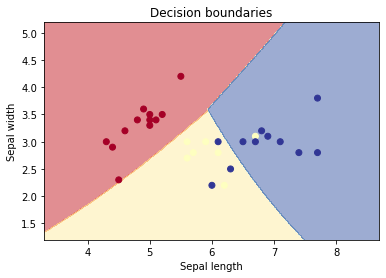

In [21]:
plt_boundary(x_test,y_test,svm)